In [ ]:
FINAL ANALYSIS:
    1. Campomulin & Ramicane were the most effective Drug Regimens.
    2. There is a high correlation between mouse weight and tumor size with the heavier the mouse, the larger the tumor size.
    3. For mouse s185, there was close to a 50% reduction in tumor size using Campomulin.

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import linregress


In [79]:
# Study data files
mouse_metadata_path = os.path.join("Downloads", "Mouse_metadata.csv")
study_results_path = os.path.join("Downloads", "Study_results.csv")

In [80]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [81]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [82]:
# Checking the number of mice.
len(pd.unique(mouse_study['Mouse ID']))

249

In [83]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = mouse_study.drop_duplicates(subset =['Mouse ID', 'Timepoint'], keep = False)

In [85]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_study['Mouse ID']))

249

In [ ]:
Summary Statistics

In [86]:


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_df = clean_study.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 
                                   'Median': tumor_median,
                                   'Variance': tumor_var,
                                   'Standard Deviation': tumor_stdev, 
                                   'SEM': tumor_sem})

summary_grouped_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [87]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_grouped_df = clean_study.groupby('Drug Regimen').agg(Mean = ('Tumor Volume (mm3)', 'mean'),
                                                             Median = ('Tumor Volume (mm3)', 'median'),
                                                             Variance = ('Tumor Volume (mm3)', 'var'),
                                                             Standard_Deviation = ('Tumor Volume (mm3)', 'std'),
                                                             SEM = ('Tumor Volume (mm3)', 'sem'))

summary_grouped_df.head()

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [ ]:
Bar and Pie Charts

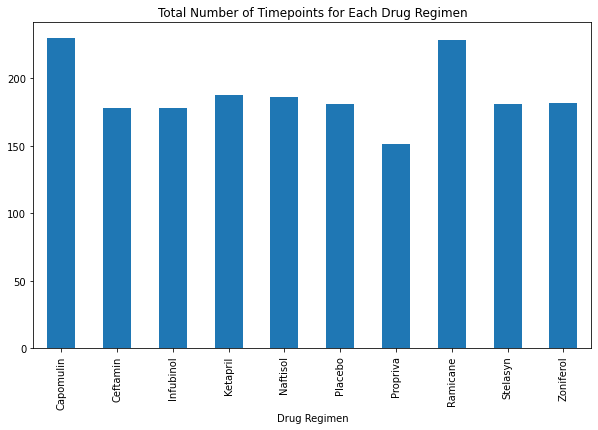

<Figure size 432x288 with 0 Axes>

In [88]:
timepoints = clean_study[["Drug Regimen","Timepoint"]]

timepoints = timepoints.set_index("Drug Regimen")

total_timepoints = timepoints.groupby(["Drug Regimen"])["Timepoint"].count()

total_timepoints.plot(kind="bar", figsize=(10,6))

plt.title("Total Number of Timepoints for Each Drug Regimen")

plt.show()
plt.tight_layout()


Text(0.5, 1.0, 'Total Number of Timepoints for Each Drug Regimen')

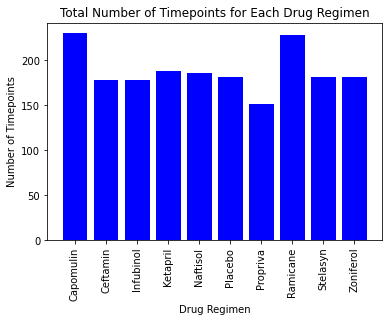

In [89]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

total_timepoints = timepoints.groupby(["Drug Regimen"])["Timepoint"].count()

drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", 
         "Ramicane", "Stelasyn", "Zoniferol"]

x_axis = np.arange(len(total_timepoints))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, total_timepoints, color="b", align="center")

plt.xticks(tick_locations, drugs, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")


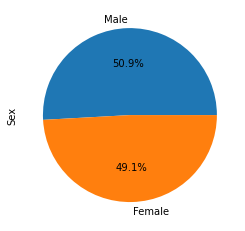

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem_male = clean_study["Sex"].value_counts()

fem_male_chart = fem_male.plot.pie(y='Sex', autopct="%1.1f%%")

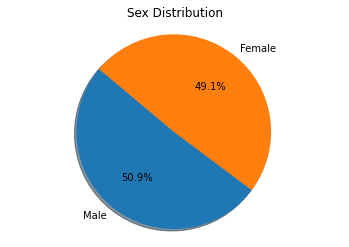

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fem_male = clean_study["Sex"].value_counts()

plt.pie(fem_male, labels=fem_male.index.values, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Sex Distribution")
plt.show()

In [ ]:
Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_study.groupby("Mouse ID")["Timepoint"].max()


# Merge df
new_max_time = pd.merge(clean_study, max_timepoint, on = "Mouse ID", how = "right")



In [93]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []

# Locate each drug from our list 'drugs' in the merged dataframe
for drug in drugs:
    
    temp_df = new_max_time.loc[new_max_time['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint_x'] == temp_df['Timepoint_y']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_volume.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')




IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


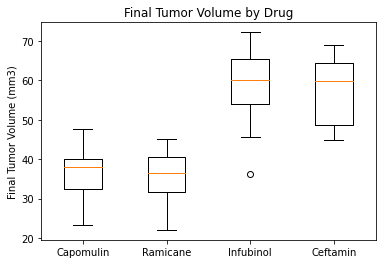

In [94]:
# Plot boxplot
plt.boxplot(tumor_volume)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

In [ ]:
Line and Scatter Plots

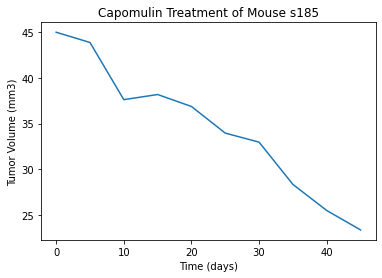

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
campo_mouse = clean_study.loc[clean_study["Mouse ID"] == 's185']

plt.plot(campo_mouse['Timepoint'], campo_mouse['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

In [96]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_reg = clean_study.loc[clean_study['Drug Regimen'] == 'Capomulin']

tumor_avg = cap_reg.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

tumor_avg_final = pd.merge(cap_reg, tumor_avg, on = "Mouse ID")

tumor_avg_final.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143


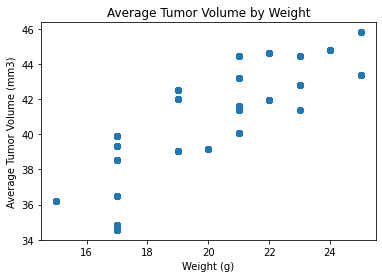

In [97]:
plt.scatter(tumor_avg_final.iloc[:,4],tumor_avg_final.iloc[:,8])

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display plot
plt.show()

In [ ]:
Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.83.


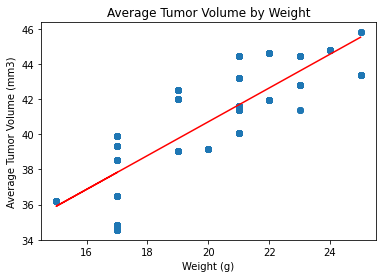

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = tumor_avg_final.iloc[:,4]
avg_tumor_vl = tumor_avg_final.iloc[:,8]
correlation = st.pearsonr(mouse_weight,avg_tumor_vl)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")


# Calculate linear regression
x_values = tumor_avg_final['Weight (g)']
y_values = tumor_avg_final['Tumor Volume (mm3)_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()